## Assignment 4 - Sales

You work for Giant Eagle and you have collected sales data for 8523 products across different Giant Eagles in different cities.  Your goal is to build a predictive model to predict the sales of each product. Below are the variables you have in your dataset.

* 'Product_Identifier': Unique product ID
* 'Product_Weight': Weight of product
* 'Product_Fat_Content': Whether the product is low fat or not
* 'Product_Visibility': The % of total display area of all products in a store allocated to the particular product
* 'Product_Type': The category to which the product belongs
* 'Product_MRP': Maximum Retail Price (list price) of the product
* 'Outlet_Identifier': Unique store ID
* 'Outlet_Establishment_Year': The year in which store was established
* 'Outlet_Size': The size of the store in terms of ground area
* 'Outlet_Location_Type': The type of city in which the store is located
* 'Outlet_Type': Whether the outlet is just a grocery store or some sort of supermarket
* 'Product_Outlet_Sales': Sales of the product in the particular store. This is the outcome variable to be predicted.

You want to run your model 1) with all the features and 2) with the lowest possible number of features that still explains (99% to 100%) of variance. Do not drop any variables other than Product Identifier and at the end of your code, compare the performance the two models you created and how you determined the number of features to keep in the second model.

Please save your file as Assignment4_LastName.

In [126]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
df = pd.read_csv("Sales_GE.csv")

In [128]:
df.info

<bound method DataFrame.info of      Product_Identifier  Product_Weight Product_Fat_Content  \
0                 FDA15           9.300             Low Fat   
1                 DRC01           5.920             Regular   
2                 FDN15          17.500             Low Fat   
3                 FDX07          19.200             Regular   
4                 NCD19           8.930             Low Fat   
...                 ...             ...                 ...   
8518              FDF22           6.865             Low Fat   
8519              FDS36           8.380             Regular   
8520              NCJ29          10.600             Low Fat   
8521              FDN46           7.210             Regular   
8522              DRG01          14.800             Low Fat   

      Product_Visibility           Product_Type  Product_MRP  \
0               0.016047                  Dairy     249.8092   
1               0.019278            Soft Drinks      48.2692   
2               0.0

In [129]:
df.head()

,Product_Identifier,Product_Weight,Product_Fat_Content,Product_Visibility,Product_Type,Product_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Product_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [130]:
df.describe()

,Product_Weight,Product_Visibility,Product_MRP,Outlet_Establishment_Year,Product_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [131]:
df.isna().sum()

Product_Identifier              0
Product_Weight               1463
Product_Fat_Content             0
Product_Visibility              0
Product_Type                    0
Product_MRP                     0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Product_Outlet_Sales            0
dtype: int64

In [132]:
mean = df['Product_Weight'].mean() 
df['Product_Weight'].fillna(mean, inplace =True)

In [133]:
df.isna().sum()

Product_Identifier              0
Product_Weight                  0
Product_Fat_Content             0
Product_Visibility              0
Product_Type                    0
Product_MRP                     0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Product_Outlet_Sales            0
dtype: int64

In [134]:
df = df.dropna()

In [135]:
df.isna().sum()

Product_Identifier           0
Product_Weight               0
Product_Fat_Content          0
Product_Visibility           0
Product_Type                 0
Product_MRP                  0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Product_Outlet_Sales         0
dtype: int64

In [136]:
df.describe()

,Product_Weight,Product_Visibility,Product_MRP,Outlet_Establishment_Year,Product_Outlet_Sales
count,6113.000000,6113.000000,6113.000000,6113.000000,6113.000000
mean,12.888856,0.064505,141.256859,1995.794373,2322.688445
std,4.073798,0.050092,62.229701,8.842615,1741.592093
min,4.555000,0.000000,31.290000,1985.000000,33.955800
25%,9.800000,0.026681,94.012000,1987.000000,974.731200
50%,12.857645,0.052811,143.178600,1997.000000,1928.156800
75%,15.700000,0.092834,185.892400,2004.000000,3271.075400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [138]:
X = df.drop(['Product_Identifier', 'Product_Outlet_Sales'], axis=1)
X_x = pd.get_dummies(X)

In [139]:
X_x.head(4)

,Product_Weight,Product_Visibility,Product_MRP,Outlet_Establishment_Year,Product_Fat_Content_LF,Product_Fat_Content_Low Fat,Product_Fat_Content_Regular,Product_Fat_Content_low fat,Product_Fat_Content_reg,Product_Type_Baking Goods,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,0,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
4,8.93,0.000000,53.8614,1987,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [140]:
y = df['Product_Outlet_Sales']

### Model 1 with all features

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_x,y, test_size = 0.3, random_state = 100)

In [142]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [143]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [144]:
predictions = knn.predict(X_test)

In [145]:
from sklearn import metrics

In [146]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE): 1212.6824567066521
Mean Squared Error (MSE): 2856341.607232123
Root Mean Squared Error (RMSE): 1690.0714799179718


In [147]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':list(range(1,50))}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.028 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.022 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.143 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.104 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.016 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.233 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.312 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.349 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.330 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.300 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.305 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=3)

In [148]:
grid.best_params_

{'n_neighbors': 6}

In [149]:
grid_predictions = grid.best_estimator_.predict(X_test)

In [150]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

Mean Absolute Error (MAE): 985.5456095783353
Mean Squared Error (MSE): 1799919.4293785598
Root Mean Squared Error (RMSE): 1341.6107592660994


### Model 2 with the lowest possible number of features that still explains (99% to 100%) of variance

In [151]:
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.09103443e-01, 6.55417030e-02, 6.29521073e-02, 5.97892791e-02,
       3.94763567e-02, 3.74028352e-02, 3.48143084e-02, 3.35691915e-02,
       3.23781195e-02, 3.21764738e-02, 3.16770766e-02, 3.14091808e-02,
       3.08709228e-02, 3.07755923e-02, 3.03662453e-02, 3.00801476e-02,
       2.97389614e-02, 2.94745093e-02, 2.92058705e-02, 2.90874514e-02,
       2.88436266e-02, 2.83185281e-02, 2.77912557e-02, 2.60256434e-02,
       2.55096994e-02, 2.33957032e-02, 2.12194823e-02, 9.00628602e-03,
       2.15168601e-32, 4.19235765e-33, 1.74602972e-33, 1.61978528e-33,
       1.45635005e-33, 1.37585560e-33, 9.93434601e-34])

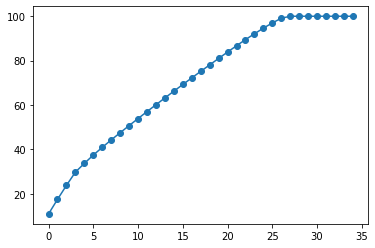

In [152]:
var1=np.cumsum(explained_variance*100)
plt.plot(var1,  marker='o')

In [153]:
pca = PCA(n_components = 26)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
sum(explained_variance)

0.9697742316396789

In [154]:
pca = PCA(n_components = 27)
X_train2 = pca.fit_transform(X_train)
X_test2 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [155]:
explained_variance

array([0.10910344, 0.0655417 , 0.06295211, 0.05978928, 0.03947636,
       0.03740284, 0.03481431, 0.03356919, 0.03237812, 0.03217647,
       0.03167708, 0.03140918, 0.03087092, 0.03077559, 0.03036625,
       0.03008015, 0.02973896, 0.02947451, 0.02920587, 0.02908745,
       0.02884363, 0.02831853, 0.02779126, 0.02602564, 0.0255097 ,
       0.0233957 , 0.02121948])

In [156]:
sum(explained_variance)

0.9909937139839683

In [158]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train2, y_train)

KNeighborsRegressor(n_neighbors=1)

In [159]:
predictions = knn.predict(X_test2)

In [160]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE): 1212.3324942202835
Mean Squared Error (MSE): 2851231.109987011
Root Mean Squared Error (RMSE): 1688.5588855550793


In [161]:
param_grid = {'n_neighbors':list(range(1,50))}
grid = GridSearchCV(KNeighborsRegressor(), param_grid, verbose=3)
grid.fit(X_train2, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV 1/5] END .....................n_neighbors=1;, score=0.035 total time=   0.0s
[CV 2/5] END .....................n_neighbors=1;, score=0.020 total time=   0.0s
[CV 3/5] END .....................n_neighbors=1;, score=0.137 total time=   0.0s
[CV 4/5] END .....................n_neighbors=1;, score=0.102 total time=   0.0s
[CV 5/5] END .....................n_neighbors=1;, score=0.019 total time=   0.0s
[CV 1/5] END .....................n_neighbors=2;, score=0.231 total time=   0.0s
[CV 2/5] END .....................n_neighbors=2;, score=0.309 total time=   0.0s
[CV 3/5] END .....................n_neighbors=2;, score=0.342 total time=   0.0s
[CV 4/5] END .....................n_neighbors=2;, score=0.326 total time=   0.0s
[CV 5/5] END .....................n_neighbors=2;, score=0.305 total time=   0.0s
[CV 1/5] END .....................n_neighbors=3;, score=0.303 total time=   0.0s
[CV 2/5] END .....................n_neighbors=3

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=3)

In [162]:
grid.best_params_

{'n_neighbors': 6}

In [163]:
grid_predictions = grid.best_estimator_.predict(X_test2)

In [164]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, grid_predictions))  
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, grid_predictions))  
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

Mean Absolute Error (MAE): 988.7743523446019
Mean Squared Error (MSE): 1804819.8470883095
Root Mean Squared Error (RMSE): 1343.4358366101112


### Conclusion

In [165]:
# Without PCA
# Mean Absolute Error (MAE): 985.5456095783353
# Mean Squared Error (MSE): 1799919.4293785598
# Root Mean Squared Error (RMSE): 1341.6107592660994

In [166]:
# With PCA
# Mean Absolute Error (MAE): 988.7743523446019
# Mean Squared Error (MSE): 1804819.8470883095
# Root Mean Squared Error (RMSE): 1343.4358366101112

When viewing the picture,I can see after 25, number of variables are explaining 99%-100% variance of data. And running  numbers of 26 and 27, I found that 27 is the lowest number of variables that explain at least 0.990% variance of data; therefore I scale the data using 27 principal variables.

As the result shows, the error gets larger for a little bit comparing to not using PCA scaling. I think PCA will not improve the performance, because we reduced the dimension so it captured less variation in the data. Since we are not getting the whole data, it is possible that the prediction error get larger.